In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn import datasets

In [25]:
iris=datasets.load_iris()

iris_data=pd.DataFrame(iris.data) #where X is...

iris_data.columns=iris.feature_names #Columns

In [26]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_scaled=scaler.fit_transform(iris_data)

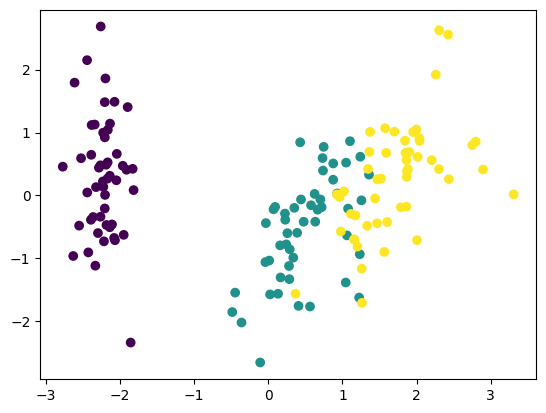

In [28]:
#Apply PCA

from sklearn.decomposition import PCA

pca=PCA(n_components=2) #4D to 2D

pca_scaled=pca.fit_transform(X_scaled)

plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=iris.target)

Text(0, 0.5, 'Eucledian Distance')

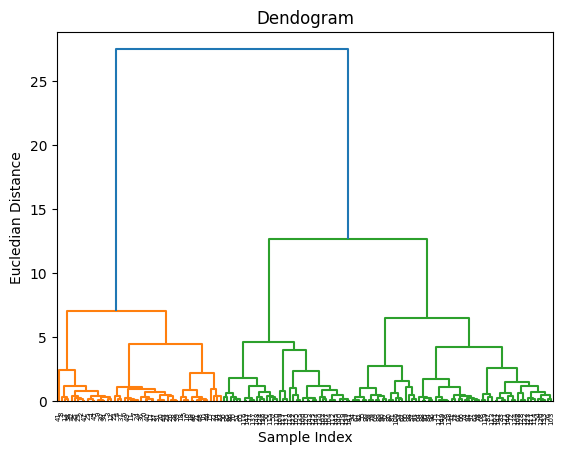

In [33]:
#Agglomerative clustering
#To construct a dendogram
import scipy.cluster.hierarchy as sc

#plot the dendogram

plt.Figure(figsize=(20,7))
plt.title('Dendogram')

#crate the dendogram
sc.dendrogram(sc.linkage(pca_scaled,method='ward')) #'ward' minimize the varinace of the cluster being merged 3 clusters to maybe 3 or less whwtever is suitable
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance') #default in sc

In [38]:
#see the clusters with agglomerative
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(metric='euclidean',
                                linkage='ward')

cluster.fit(pca_scaled)

,n_clusters,2
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [39]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

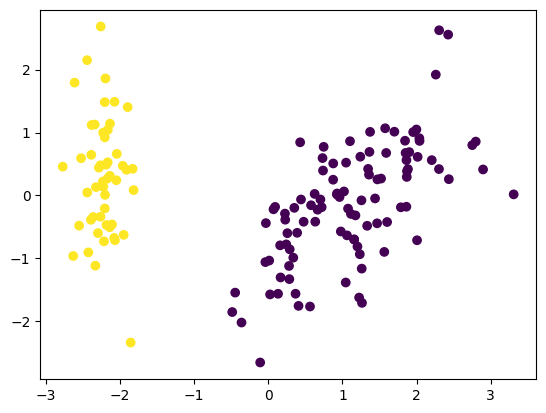

In [40]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)